# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [1]:
import numpy as np
import scipy
from scipy import stats
from statsmodels.stats.weightstats import ztest
from statsmodels.stats import weightstats as stests
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import ttest_ind
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.stats import shapiro
from scipy.stats import anderson
from scipy.stats import sem
import pandas as pd
import pandas.plotting
from IPython import display
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency
%matplotlib inline
sns.set()

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

# Data Analysis

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [4]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [5]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [6]:
data.columns

Index(['id', 'ad', 'education', 'ofjobs', 'yearsexp', 'honors', 'volunteer',
       'military', 'empholes', 'occupspecific', 'occupbroad', 'workinschool',
       'email', 'computerskills', 'specialskills', 'firstname', 'sex', 'race',
       'h', 'l', 'call', 'city', 'kind', 'adid', 'fracblack', 'fracwhite',
       'lmedhhinc', 'fracdropout', 'fraccolp', 'linc', 'col', 'expminreq',
       'schoolreq', 'eoe', 'parent_sales', 'parent_emp', 'branch_sales',
       'branch_emp', 'fed', 'fracblack_empzip', 'fracwhite_empzip',
       'lmedhhinc_empzip', 'fracdropout_empzip', 'fraccolp_empzip',
       'linc_empzip', 'manager', 'supervisor', 'secretary', 'offsupport',
       'salesrep', 'retailsales', 'req', 'expreq', 'comreq', 'educreq',
       'compreq', 'orgreq', 'manuf', 'transcom', 'bankreal', 'trade',
       'busservice', 'othservice', 'missind', 'ownership'],
      dtype='object')

In [7]:
w = data[data.race=='w']
b = data[data.race=='b']

In [8]:
# Distribution of Race
data.race.value_counts()

b    2435
w    2435
Name: race, dtype: int64

In [9]:
# Percent distribution of race
pd.DataFrame(data.race.value_counts(normalize=True))

,race
b,0.5
w,0.5


In [10]:
sum(data[data.race=='b'].call)

157.0

In [11]:
# Proportion whether called for interview or not
data[data.race=='b'].call.value_counts()

0.0    2278
1.0     157
Name: call, dtype: int64

In [12]:
# Proportion percent of whites by call
pd.DataFrame(data[data.race=='w'].call.value_counts(normalize=True))

,call
0.0,0.903491
1.0,0.096509


In [13]:
# Proportion percent of blacks by call
pd.DataFrame(data[data.race=='b'].call.value_counts(normalize=True))

,call
0.0,0.935524
1.0,0.064476


In [14]:
# Call proportion grouped by race
by_race = data.groupby('race').call.value_counts(normalize=True)
by_race

race  call
b     0.0     0.935524
      1.0     0.064476
w     0.0     0.903491
      1.0     0.096509
Name: call, dtype: float64

In [15]:
# Unstack for better view
by_race.unstack()

call,0.0,1.0
race,,
b,0.935524,0.064476
w,0.903491,0.096509


Text(0.5, 1.0, 'White')

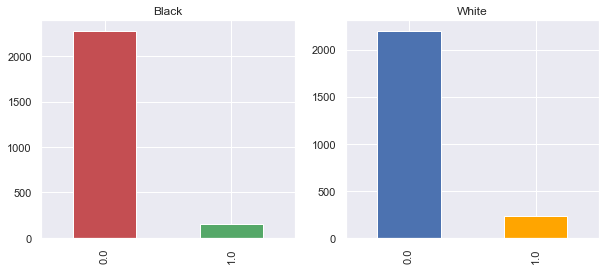

In [16]:
# Plot the values by race
plt.figure(figsize=(10,4))
plt.subplot(1,2,1);data[data.race=='b'].call.value_counts().plot(kind='bar',color=['r','g']);plt.title('Black')
plt.subplot(1,2,2);data[data.race=='w'].call.value_counts().plot(kind='bar',color=['b','orange']);plt.title('White')

# 1. What test is appropriate for this problem? Does CLT apply?

# Answer:         
. This is a sample dealing with proportions of discrete variables rather than continuous ones.     
. Two-sample bootstrapping comparison would be applicable as we have 2 samples black names and white names.      
. The Central Limit Theorem could be applied as we are dealing with binomial distributions where the Bernoulli trial results in a success or a failure. The Central Limit Theorem says that when we add independent random variables, the distribution of that sum assumes a normal distribution.          
. Sample size n > 30 suggests that z-statistics is more appropriate than t-statistics.       

# 2. What are the null and alternate hypotheses?

# Answer:         
H0: Pw = Pb (There is no difference between the proportion of white and black call backs)       
H1: Pw ≠ Pb (There is difference between the proportion of white and black call backs)    

# 3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.

# Answer:         

In [17]:
# Bootstrap approach
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

# Compute the difference of the sample means: mean_diff
mean_diff = np.mean(w.call) - np.mean(b.call)

# Get bootstrap replicates of means
bs_replicates_b = draw_bs_reps(b.call, np.mean, 10000)
bs_replicates_w = draw_bs_reps(w.call, np.mean, 10000)

# Compute samples of difference of means
bs_diff_replicates = bs_replicates_w - bs_replicates_b

# Calculate Margin of Error
bs_diff_std = np.std(bs_diff_replicates)

# Calculate 95% confidence interval
bs_diff_conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])

# Print the results
print('Standard Margin of Error:', bs_diff_std)
print(' 95% confidence interval:', bs_diff_conf_int)

Standard Margin of Error: 0.007760337119716098
 95% confidence interval: [0.01642711 0.04722793]


In [18]:
boot = pd.concat([w.call,b.call])
boot_mean = np.mean(boot)
boot_mean

# Generate shifted arrays
b_shifted = w.call - np.mean(b.call) + boot_mean
w_shifted = w.call - np.mean(w.call) + boot_mean

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_b = draw_bs_reps(b_shifted, np.mean, 10000)
bs_replicates_w = draw_bs_reps(w_shifted, np.mean, 10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_w - bs_replicates_b

# Compute and print p-value: p
p = np.sum(bs_replicates >= mean_diff) / 10000
print('p_value =', p)

p_value = 0.0


### From the above bootstrap statistics showing p=0.0 which is less than the significance level of 0.05, we can reject the null hypothesis and accept the alternate hypothesis which states that there is a significant diffrence in the proportion of white and black call backs.

In [19]:
# z test
stests.ztest(w.call, b.call)

(4.114705356750735, 3.8767429116085706e-05)

In [20]:
# t test
stats.ttest_ind(w.call, b.call)

Ttest_indResult(statistic=4.114705290861751, pvalue=3.940802103128886e-05)

In [21]:
sem_w = scipy.stats.sem(w.call)
sem_w

0.005985301397503016

In [22]:
sem_b = scipy.stats.sem(b.call)
sem_b

0.0049781434352911685

In [23]:
sem_w-sem_b

0.0010071579622118474

In [24]:
# Spearman Rank correlation coefficient
spear_coeff, p_val = spearmanr(data.race, data.call)
print('Spearman Rank Correlation Coefficient %0.3f' %(spear_coeff))

Spearman Rank Correlation Coefficient 0.059


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


# χ2  Chi-squared Test for Equality of Proportions


In [25]:
# Create crosstab table
table = pd.crosstab(index = data.call, columns = data.race)
table

race,b,w
call,,
0.0,2278,2200
1.0,157,235


In [26]:
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square Statistic: %0.6f \n             p_value: %0.6f' %(chi2,p))

Chi-square Statistic: 16.449029 
             p_value: 0.000050


### Also from the above frequentist statistics, Chi test showing p=0.0 which is less than the significance level of 0.05, we can reject the null hypothesis and accept the alternate hypothesis which states that there is a significant diffrence in the proportion of white and black call backs.

# 4. Write a story describing the statistical significance in the context or the original problem.

Our null hypothesis states that the proportion of white and black call backs are the same and the alternate hypothesis being the proportions are significantly different. Upon performing both bootstrapping and frequentist Chi square statistics, both yield the same low p value indicating that race is a significant variable in the proportion of white and black callbacks. 

# 5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

This however does not mean race is the only reason for the call back disproportion. Multivariate analysis must be performed on all other variables like sex, education, military, years of experience, skills, honors etc. in the data set, as some other variables might affect the differnce in call back proportions other than just the race.